In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/Age Group Identification/age_group_classification_dataset.zip'


Streaming output truncated to the last 5000 lines.
  inflating: Age_classification dataset/4-6/face (226).png  
  inflating: Age_classification dataset/4-6/face (227).png  
  inflating: Age_classification dataset/4-6/face (228).png  
  inflating: Age_classification dataset/4-6/face (229).png  
  inflating: Age_classification dataset/4-6/face (23).jpg  
  inflating: Age_classification dataset/4-6/face (23).png  
  inflating: Age_classification dataset/4-6/face (230).png  
  inflating: Age_classification dataset/4-6/face (231).png  
  inflating: Age_classification dataset/4-6/face (232).png  
  inflating: Age_classification dataset/4-6/face (233).png  
  inflating: Age_classification dataset/4-6/face (234).png  
  inflating: Age_classification dataset/4-6/face (235).png  
  inflating: Age_classification dataset/4-6/face (236).png  
  inflating: Age_classification dataset/4-6/face (237).png  
  inflating: Age_classification dataset/4-6/face (238).png  
  inflating: Age_classification data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
import pandas as pd
import numpy as np
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications import Xception
from keras.applications import DenseNet121, DenseNet169, DenseNet201
from keras.optimizers import Adam, RMSprop,SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from PIL import Image
import cv2
import os
import glob
import itertools

In [ ]:
directory = "/content/Age_classification dataset"
folders = os.listdir(directory)
print(folders)

image_names = []
size = (224,224)



['38-43', '4-6', '48-53', '8-12', '15-20', '0-2', '25-32', '60-100']


In [ ]:
dataset_labels = []
dataset = []
for folder in folders:
    for file in os.listdir(os.path.join(directory,folder)):
          image_names.append(os.path.join(directory,folder,file))
          dataset_labels.append(folder)
          img = cv2.imread(os.path.join(directory,folder,file))
          # resize image
          img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
          im = cv2.resize(img,size,interpolation = cv2.INTER_CUBIC)
          dataset.append(im)
      

In [ ]:
label_dummies = pd.get_dummies(dataset_labels)
labels =  label_dummies.values.argmax(1)
print(pd.unique(dataset_labels))
print(pd.unique(labels))


# Convert the shuffled list to numpy array type

dataset = np.array(dataset)
labels = np.array(labels)

print ("total dataset shape",dataset.shape)
print ("total Labels shape",labels.shape)


['38-43' '4-6' '48-53' '8-12' '15-20' '0-2' '25-32' '60-100']
[3 4 5 7 1 0 2 6]
total dataset shape (12000, 224, 224, 3)
total Labels shape (12000,)


In [ ]:
# normalize dataset
dataset = dataset.astype('float32') 
dataset /= 255

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset,labels,test_size=0.1,random_state = 3, shuffle=True)

print("x train=",X_train.shape)
print("y train=",Y_train.shape)

print("x test=",X_test.shape)
print("y test=",Y_test.shape)



x train= (10800, 224, 224, 3)
y train= (10800,)
x test= (1200, 224, 224, 3)
y test= (1200,)


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        fill_mode = 'nearest')  

datagen.fit(X_train)

# Fine Tune InceptionResnetV2 Network

In [ ]:
from keras.applications import InceptionResNetV2

In [ ]:
base_model2 = InceptionResNetV2( weights = 'imagenet',include_top = False, input_shape = (224,224,3))

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
for i, layer in enumerate(base_model2.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 conv2d_12
51 conv2d_14
52 conv2d_17
53 batch_normalization_12
54 batch_normalization_14
55 batch_normalization_17
56 activa

In [ ]:
NUM_CLASSES = 8

model2 = Sequential()
model2.add(base_model2)
model2.add(Flatten())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(256,activation = 'relu'))
model2.add(Dropout(0.5))
#model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
for layer in base_model2.layers:
    layer.trainable = False


In [ ]:
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              39322624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2

In [ ]:
epochs = 10
batch_size = 32
history = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
337/337 [==============================] - 141s 380ms/step - loss: 1.7955 - accuracy: 0.3603 - val_loss: 1.1519 - val_accuracy: 0.5100
Epoch 2/10
337/337 [==============================] - 124s 369ms/step - loss: 1.3453 - accuracy: 0.4582 - val_loss: 1.0530 - val_accuracy: 0.5733
Epoch 3/10
337/337 [==============================] - 125s 369ms/step - loss: 1.2721 - accuracy: 0.4917 - val_loss: 1.0357 - val_accuracy: 0.5708
Epoch 4/10
337/337 [==============================] - 124s 367ms/step - loss: 1.2264 - accuracy: 0.4920 - val_loss: 1.0105 - val_accuracy: 0.5717
Epoch 5/10
337/337 [==============================] - 117s 348ms/step - loss: 1.1882 - accuracy: 0.5130 - val_loss: 0.9721 - val_accuracy: 0.6017
Epoch 6/10
337/337 [==============================] - 117s 347ms/step - loss: 1.1493 - accuracy: 0.5320 - val_loss: 0.9914 - val_accuracy: 0.5850
Epoch 7/10
337/337 [==============================] - 118s 350ms/step - loss: 1.1398 - accuracy: 0.5331 - val_loss: 1.0014 -

In [ ]:
for layer in base_model2.layers[:287]:
    layer.trainable = False
for layer in base_model2.layers[287:]:
    layer.trainable = True


In [ ]:
NUM_CLASSES = 8

model3 = Sequential()
model3.add(base_model2)
model3.add(Flatten())
model3.add(Dense(1024, activation = 'relu'))
model3.add(Dense(512,activation = 'relu'))
model3.add(Dense(256,activation = 'relu'))
#model3.add(Dense(128,activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(NUM_CLASSES, activation='softmax'))



In [ ]:
model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              39322624  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

In [ ]:
epochs = 15
batch_size = 32
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
337/337 [==============================] - 149s 390ms/step - loss: 1.7147 - accuracy: 0.3363 - val_loss: 0.9138 - val_accuracy: 0.6225
Epoch 2/15
337/337 [==============================] - 128s 379ms/step - loss: 0.9886 - accuracy: 0.5977 - val_loss: 0.8259 - val_accuracy: 0.6700
Epoch 3/15
337/337 [==============================] - 128s 378ms/step - loss: 0.8517 - accuracy: 0.6554 - val_loss: 0.8874 - val_accuracy: 0.6292
Epoch 4/15
337/337 [==============================] - 125s 371ms/step - loss: 0.7742 - accuracy: 0.6826 - val_loss: 0.6805 - val_accuracy: 0.7175
Epoch 5/15
337/337 [==============================] - 123s 365ms/step - loss: 0.6888 - accuracy: 0.7224 - val_loss: 0.7250 - val_accuracy: 0.6975
Epoch 6/15
337/337 [==============================] - 125s 369ms/step - loss: 0.6269 - accuracy: 0.7466 - val_loss: 0.7847 - val_accuracy: 0.6908
Epoch 7/15
337/337 [==============================] - 123s 366ms/step - loss: 0.5794 - accuracy: 0.7694 - val_loss: 0.7991 -

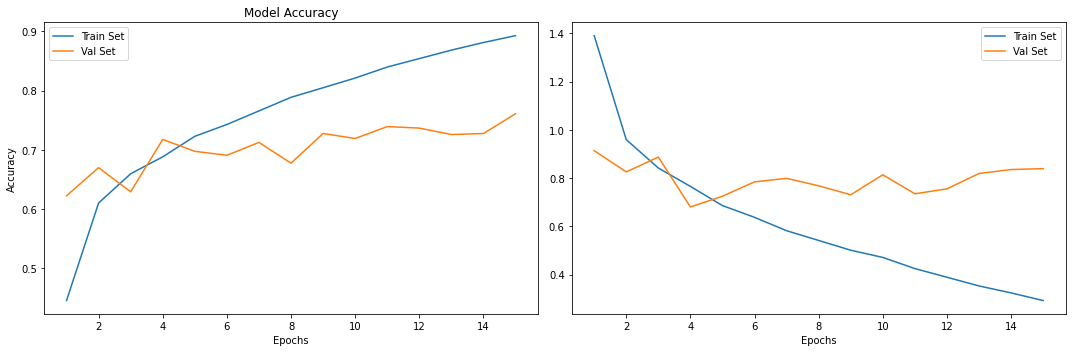

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

In [ ]:
epochs = 2
batch_size = 32
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
337/337 [==============================] - 119s 354ms/step - loss: 0.1475 - accuracy: 0.9503 - val_loss: 1.3084 - val_accuracy: 0.7333
Epoch 2/2
337/337 [==============================] - 119s 353ms/step - loss: 0.1316 - accuracy: 0.9556 - val_loss: 1.4432 - val_accuracy: 0.7342


In [ ]:
pred=model3.predict(X_test)
y_pred=np.argmax(pred,axis=1)
loss, acc = model3.evaluate(X_test, Y_test, verbose = 0)
print("\nEvaluation on test data: ", acc * 100)



Evaluation on test data:  76.08333230018616


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

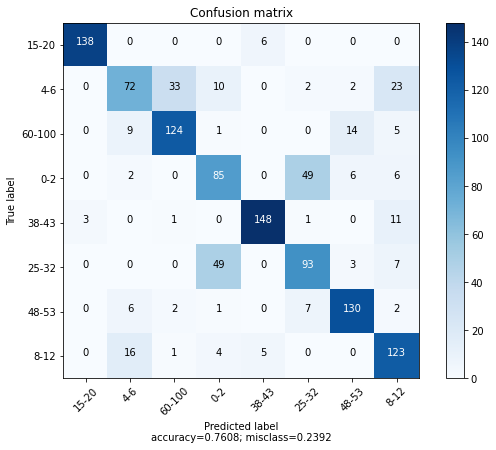

In [ ]:
confusion_mtx = confusion_matrix(Y_test, y_pred)
cm_plot_labels = ['15-20', '4-6', '60-100', '0-2', '38-43', '25-32', '48-53', '8-12']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)


In [ ]:
model3.save ("/content/drive/MyDrive/Age Group Identification/saved model/model_inceptionResnetv2.h5")


# Application Phase

In [ ]:
file_path = '/content/drive/MyDrive/Age Group Identification/girl2.jfif'
input_image  = cv2.imread(file_path)


In [ ]:
resized_image = cv2.resize(input_image, (224, 224), interpolation = cv2.INTER_CUBIC)
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
image = np.array(rgb_image)
image  = image.astype('float32') 
image= image/ 255


In [ ]:
model = load_model('/content/drive/MyDrive/Age Group Identification/saved model/model_inceptionResnetv2.h5')

In [ ]:
['38-43' '4-6' '48-53' '8-12' '15-20' '0-2' '25-32' '60-100']
[3 4 5 7 1 0 2 6]

In [ ]:
classes = { 
    0:'0-2',
    1:'15-20',
    2:'25-32',
    3:'38-43',
    4:'4-6',
    5:'48-53',
    6:'60-100',
    7:'8-12'
}

In [ ]:
classes = { 
    3:'38-43',
    4:'4-6',
    5:'48-52',
    7:'8-12',
    1:'15-20',
    0:'0-2',
    2:'25-32',
    6:'60-100'
}

In [ ]:
image = np.expand_dims(image, axis=0)
pred = model.predict_classes([image])[0]
sign = classes[pred]
print(sign)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


15-20


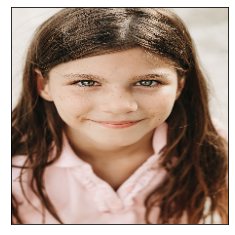

In [ ]:
plt.imshow(rgb_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()